#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [5]:
dataset = pd.read_csv('Student_performance_data _2.csv')
dataset = dataset.drop(columns=['StudentID', 'Age' , 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'])
dataset.rename(columns = { 'GradeClass': 'Grade'}, inplace=True)
dataset

,Gender,Ethnicity,StudyTimeWeekly,Absences,GPA,Grade
0,Female,Caucasian,19.833723,7,2.929196,Pass
1,Male,Caucasian,15.408756,0,3.042915,Pass
2,Male,Asian,4.210570,26,0.112602,Fail
3,Female,Caucasian,10.028829,14,2.054218,Fail
4,Female,Caucasian,4.672495,17,1.288061,Fail
...,...,...,...,...,...,...
2387,Female,Caucasian,10.680555,2,3.455509,Pass
2388,Male,Caucasian,7.583217,4,3.279150,Fail
2389,Female,Caucasian,6.805500,20,1.142333,Pass
2390,Female,AfricanAmerican,12.416653,17,1.803297,Pass


In [7]:
dataset['Grade'].value_counts() 
#there is little bit of imbalanced dataset

Fail    1625
Pass     767
Name: Grade, dtype: int64

In [8]:
#sns.scatterplot(data = dataset, x='StudyTimeWk', y='GPA', hue='Grade', alpha=0.7) 

#### Create Dummy Variables
Note: if we leave Ethnicity as is the model might interpret that there is level of importance For example, 3: Other is greater than 2: Asian which is greater than 1: African American, etc. We want to avoid the relationship/level of importance and turn them into binary/dummy.

Gender is good, Ethnicity needs converted, StudyTime is good, Absences is good (as more the more important it is), GPA is good, and Grade needs converted (A, B or C needs to be Pass and D & F needs to be fail

In [9]:
df = pd.get_dummies(dataset, drop_first=True) #To avoid multicollinearity (especially useful for regression models)
df = pd.concat([df], axis=1)
df

,StudyTimeWeekly,Absences,GPA,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,Grade_Pass
0,19.833723,7,2.929196,0,0,1,0,1
1,15.408756,0,3.042915,1,0,1,0,1
2,4.210570,26,0.112602,1,1,0,0,0
3,10.028829,14,2.054218,0,0,1,0,0
4,4.672495,17,1.288061,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2387,10.680555,2,3.455509,0,0,1,0,1
2388,7.583217,4,3.279150,1,0,1,0,0
2389,6.805500,20,1.142333,0,0,1,0,1
2390,12.416653,17,1.803297,0,0,0,0,1


#### Separate X features & y labels

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling (Standard Scaler)

In [12]:
from sklearn.preprocessing import StandardScaler #Always scale for KNN because it is using distance
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### TRAIN the model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  #all of these are default values anyway
model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

#### TEST the model

In [14]:
y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,y_test,y_pred
24,0,0
310,0,0
331,1,1
401,1,1
408,0,0


#### EVAULATE the model

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ ----does not involve learning a set of parameters or coefficients from the training data

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

#Darn not the best model, recall is close but precision is not. Definitely we work with imbalanced data

Accuracy Score: 0.906054279749478
Precision Score: 0.9055966254323373
Recall Score: 0.906054279749478
F1 Score: 0.9048046049883797


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


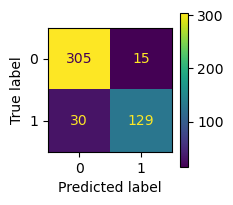

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(2, 2)

In [17]:
confusion_matrix(y_test, y_pred)

array([[305,  15],
       [ 30, 129]], dtype=int64)

In [19]:
# can also predict probability for a point, not just for the class (1, or 0)
probability_data = model.predict_proba(scaled_X_test)
new_df['PercentChance0Class'] = probability_data[:, 0]
new_df['PercentChance1Class'] = probability_data[:, 1]

new_df

#for row 1
# there is 60% chance of belonging to class 0 & 40% of belonging to class 1
# and it predicted correctly

,y_test,y_pred,PercentChance0Class,PercentChance1Class
0,0,0,0.6,0.4
1,1,1,0.2,0.8
2,0,0,1.0,0.0
3,0,0,1.0,0.0
4,1,1,0.0,1.0
...,...,...,...,...
474,0,0,1.0,0.0
475,0,0,1.0,0.0
476,0,0,0.8,0.2
477,0,0,1.0,0.0


#### Visualize the model

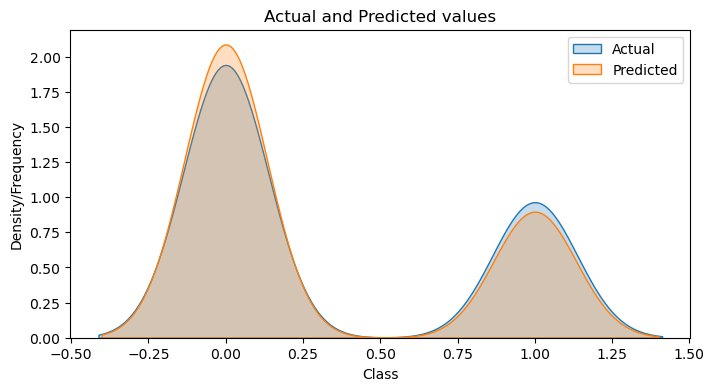

In [20]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, good model

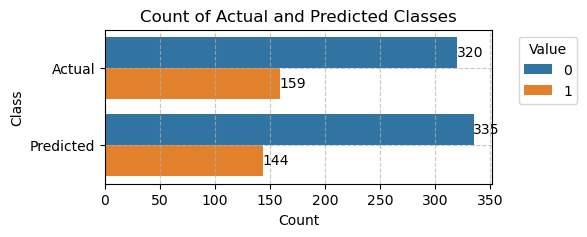

In [23]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(5, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict new student

In [24]:
print(model.predict(scaler.transform([[14, 2, 3.4, 0, 0, 1, 0]])))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 3.4, is female, caucasian then the student will Pass
print(model.predict_proba(scaler.transform([[14, 2, 3.4, 0, 0, 1, 0]])))
#the model is 0% sure that this new student belongs to class 0, and 100% sure that it will pass

[1]
[[0. 1.]]


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
print(model.predict(scaler.transform([[14, 2, 1.0, 0, 0, 1, 0]])))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 1.0, is female, caucasian then the student will Fail
print(model.predict_proba(scaler.transform([[14, 2, 1.0, 0, 0, 1, 0]])))
#the model is 100% sure that this new student will Fail, and 0% sure that it will pass

[0]
[[1. 0.]]


C:\Users\btemo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Elbow method
Huge difference in class 2. Not a terrible model, but perhaps the Elbow method will tell us how many Ks to use

Text(0, 0.5, 'Error Rate')

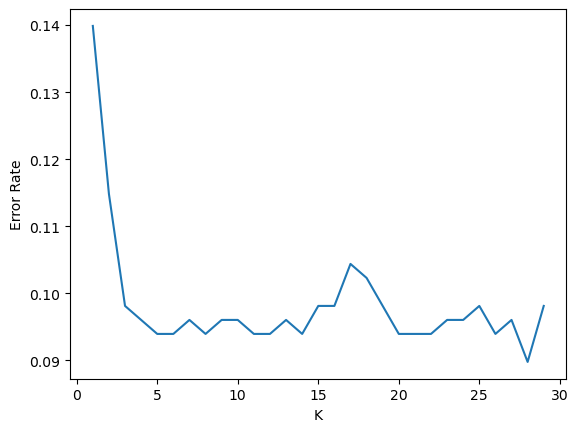

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)
    
    
#visualize the elbow method
plt.plot(range(1, 30), test_error_rates)
plt.xlabel('K')
plt.ylabel('Error Rate')

# it seems that k=5 is the number, as the rest increase the error rate

Well it says to use 5, and that is the default parameter

#### Set up GridSearch Cross Validation process to tell you what is the optimal number of k

In [27]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

from sklearn.model_selection import GridSearchCV
k_values = list(range(1, 20))

param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, y_train) #no need to scale it

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [28]:
full_cv_classifier.best_estimator_.get_params()
#note below says knn_n_neighbors it chose 5 as the number of k

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [29]:
full_pred = full_cv_classifier.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, full_pred)}')
print(f"Precision Score: {precision_score(y_test, full_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, full_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, full_pred, average='weighted')}")

Accuracy Score: 0.906054279749478
Precision Score: 0.9055966254323373
Recall Score: 0.906054279749478
F1 Score: 0.9048046049883797


In [30]:
#Results from model 1

#Accuracy Score: 0.906054279749478
#Precision Score: 0.9055966254323373
#Recall Score: 0.906054279749478
#F1 Score: 0.9048046049883797

#OK the default parameters were good enough